In [6]:
import pandas as pd
from sklearn import metrics

In [8]:
predictions = pd.read_csv("../data/processed/raw_predictions.csv")
real_values = pd.read_csv("../data/processed/test_users.csv")

In [9]:
df = predictions.merge(real_values, on="UserId")
df.head()

,UserId,predictions,Fake
0,007E6F5744,1.661340e-02,0
1,00CABCB25E,8.063640e-05,0
2,00FEFAB150,2.921727e-05,0
3,0122428A28,9.996356e-07,0
4,014AFCC716,6.767072e-04,0


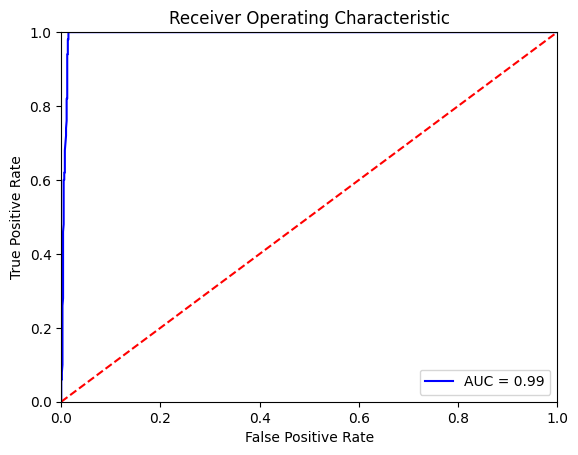

In [10]:
fpr, tpr, threshold = metrics.roc_curve(df["Fake"], df["predictions"])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()